<a href="https://colab.research.google.com/github/Keerthibalraj/DAY_1_CBT_COURSE_SERIES/blob/main/CBT_AIML_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topics to be covered**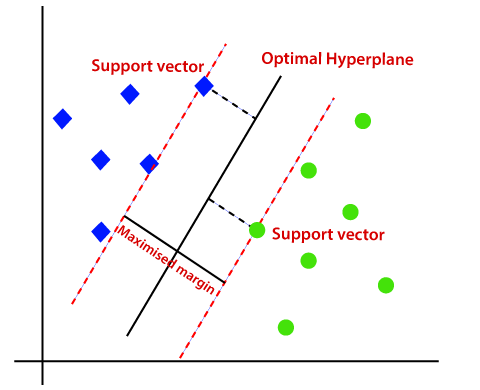

*   Python Libraries
*   Data Exploration
*   List item
*   Feature Ranking
*   Feature Selection
*   Model Development
*   Model Evaluation

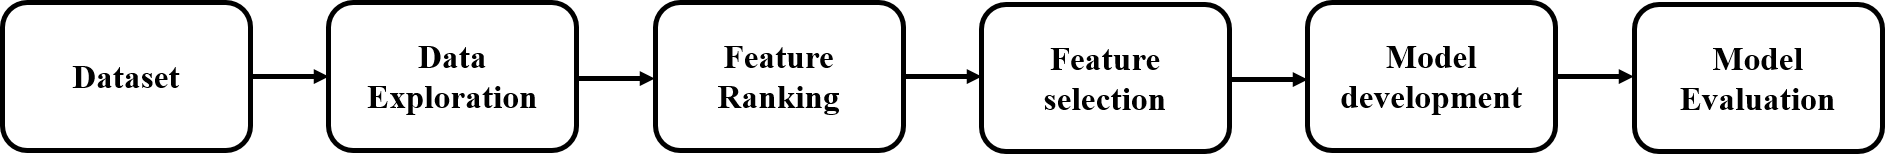



**Import Libraries**

In [ ]:
import pandas as pd                       # Pandas library in Python is a powerful tool for handling and analyzing structured data
import numpy as np                        # Numerical operations- Supports large, multi-dimensional array and matrices
import matplotlib.pyplot as plt           # Interactive visualizations
import seaborn as sns                     # Statistical data visualization library
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score, StratifiedKFold    # Splitting datasets and performing cross-validation
from sklearn.feature_selection import SelectKBest, f_classif    # Feature selection in machine learning

from sklearn.decomposition import PCA     # Feature Reduction
from sklearn.svm import SVC               # Classification technique
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix   # Evaluating the performance of classification model
import shap                               # Explaining the output of machine learning models

#from sklearn.preprocessing import label_binarize     # Converting categorical class labels into binary format

# **Loading data and Exploration**

In [ ]:
# Load the dataset
**missing code**

In [ ]:
# Display basic information about the dataset
print("Basic information about the dataset:")
**missing code**

In [ ]:
# Display summary statistics
print("\nSummary statistics of numeric features:")
**missing code**

In [ ]:
# Distribution of Diagnosis
plt.figure(figsize=(8, 6))
**missing code**
plt.title('Distribution of Diagnosis (Malignant and Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [ ]:
# Pairplot with color based on 'diagnosis' for selected features
selected_features = ['radius_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(df, hue='diagnosis', markers=['o', 's'], diag_kind='kde', vars=selected_features)
plt.suptitle('Pairplot of Selected Features colored by Diagnosis', y=1.02)
plt.show()

In [ ]:
# Correlation matrix heatmap
correlation_matrix = **missing code**
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Create box plots for selected features
selected_features = ['radius_mean', 'area_mean', 'smoothness_mean', 'concavity_mean']

plt.figure(figsize=(12, 8))
plt.suptitle('Box Plots for Selected Features', y=1.02)

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
    plt.title(f'Box Plot - {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# 'diagnosis' column is the target variable (y) and the rest are features (x)
X = **missing code**
Y = **missing code**  # Convert categorical labels to binary (Malignant: 1, Benign: 0)


In [ ]:
# Split the data into training and val sets
X_train, X_test, y_train, y_test = **missing code**

In [ ]:
#Checking shape
print("Shape of x_train:", X_train.shape)
print("Size of x_train:", X_train.size)

print("Shape of x_test:", X_test.shape)
print("Size of x_test:", X_test.size)

# **Feature Ranking (ANOVA F-statistic)**

The ANOVA F-statistic is a measure used in Analysis of Variance to assess whether the means of three or more groups are significantly different.

In [ ]:
# Feature ranking using SelectKBest with ANOVA F-statistic
k_best = *missing code*  # Select top 10 features
X_train_top_features = k_best.fit_transform(X_train, y_train)
X_test_top_features = k_best.transform(X_test)

In [ ]:
# Get the feature scores
feature_scores = k_best.scores_

# Get the indices of the top-k features
top_k_indices = np.argsort(feature_scores)[::-1][:15]

# Get the names of the top-k features
top_k_features = X.columns[top_k_indices]

# Plot the feature ranking
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_k_features)), feature_scores[top_k_indices], align='center')
plt.xticks(range(len(top_k_features)), top_k_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Ranking')
plt.show()

# **Feature selection**

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and statistics. The primary goal of PCA is to transform a high-dimensional dataset into a lower-dimensional one while retaining as much of the original variability as possible. This is achieved by identifying and emphasizing the most important patterns or directions in the data.

In [ ]:
# Apply PCA to reduce dimensionality
pca = **missing code**  # Set the desired number of components
X_train_pca = pca.fit_transform(X_train_top_features)
X_val_pca = pca.transform(X_val_top_features)
X_test_pca = pca.transform(X_test_top_features)

# **Classification- Model development**


Before hyper-parameter tuning



**Support Vector Machine (SVM)** is a supervised machine learning algorithm that is used for classification and regression tasks. It is particularly effective for high-dimensional datasets and is well-suited for both linear and nonlinear relationships in the data. SVM works by finding the optimal hyperplane that best separates the data into different classes.

Here are the key concepts and steps involved in SVM:

**Objective:**

The primary goal of SVM is to find a hyperplane that best separates the data points of different classes. In a binary classification scenario, this hyperplane aims to maximize the margin between the classes.

**Margin:**

The margin is the distance between the hyperplane and the nearest data point of either class. SVM aims to maximize this margin, as it is associated with better generalization to unseen data.

**Support Vectors:**

Support vectors are the data points that lie closest to the hyperplane. These points are crucial in determining the optimal hyperplane and defining the margin.


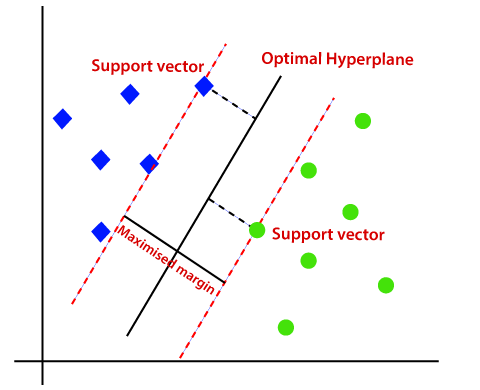

In [ ]:
**missing model**

After hyper-parameter tuning

**Kernel Trick:**

SVM can be extended to handle nonlinear relationships by using a kernel function. The kernel function allows SVM to implicitly map the input data into a higher-dimensional space where a hyperplane can effectively separate the classes.

**C Parameter:**

The C parameter in SVM controls the trade-off between achieving a smooth decision boundary and classifying the training points correctly. A higher C value allows for a more complex decision boundary but may lead to overfitting.

**Gamma Parameter (for non-linear kernels):**

The gamma parameter influences the shape of the decision boundary in the case of a non-linear kernel. A higher gamma value leads to a more complex decision boundary.

In [ ]:
**Missing model**

# **Performance measures**

**Accuracy:** The accuracy_score function from scikit-learn is used to calculate the accuracy of the SVM model on the validation set.

**Precision:** The precision_score function calculates the precision of the model, which is the ratio of true positives to the sum of true positives and false positives.

**Recall (Sensitivity):** The recall_score function calculates the recall of the model, which is the ratio of true positives to the sum of true positives and false negatives.

**F1 Score:** The f1_score function computes the F1 score, which is the harmonic mean of precision and recall.

**ROC Curve and AUC:** The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are calculated using the roc_curve and auc functions. This is commonly used for binary classification problems.

**Confusion Matrix:** The confusion_matrix function generates a confusion matrix, showing the counts of true positives, true negatives, false positives, and false negatives.

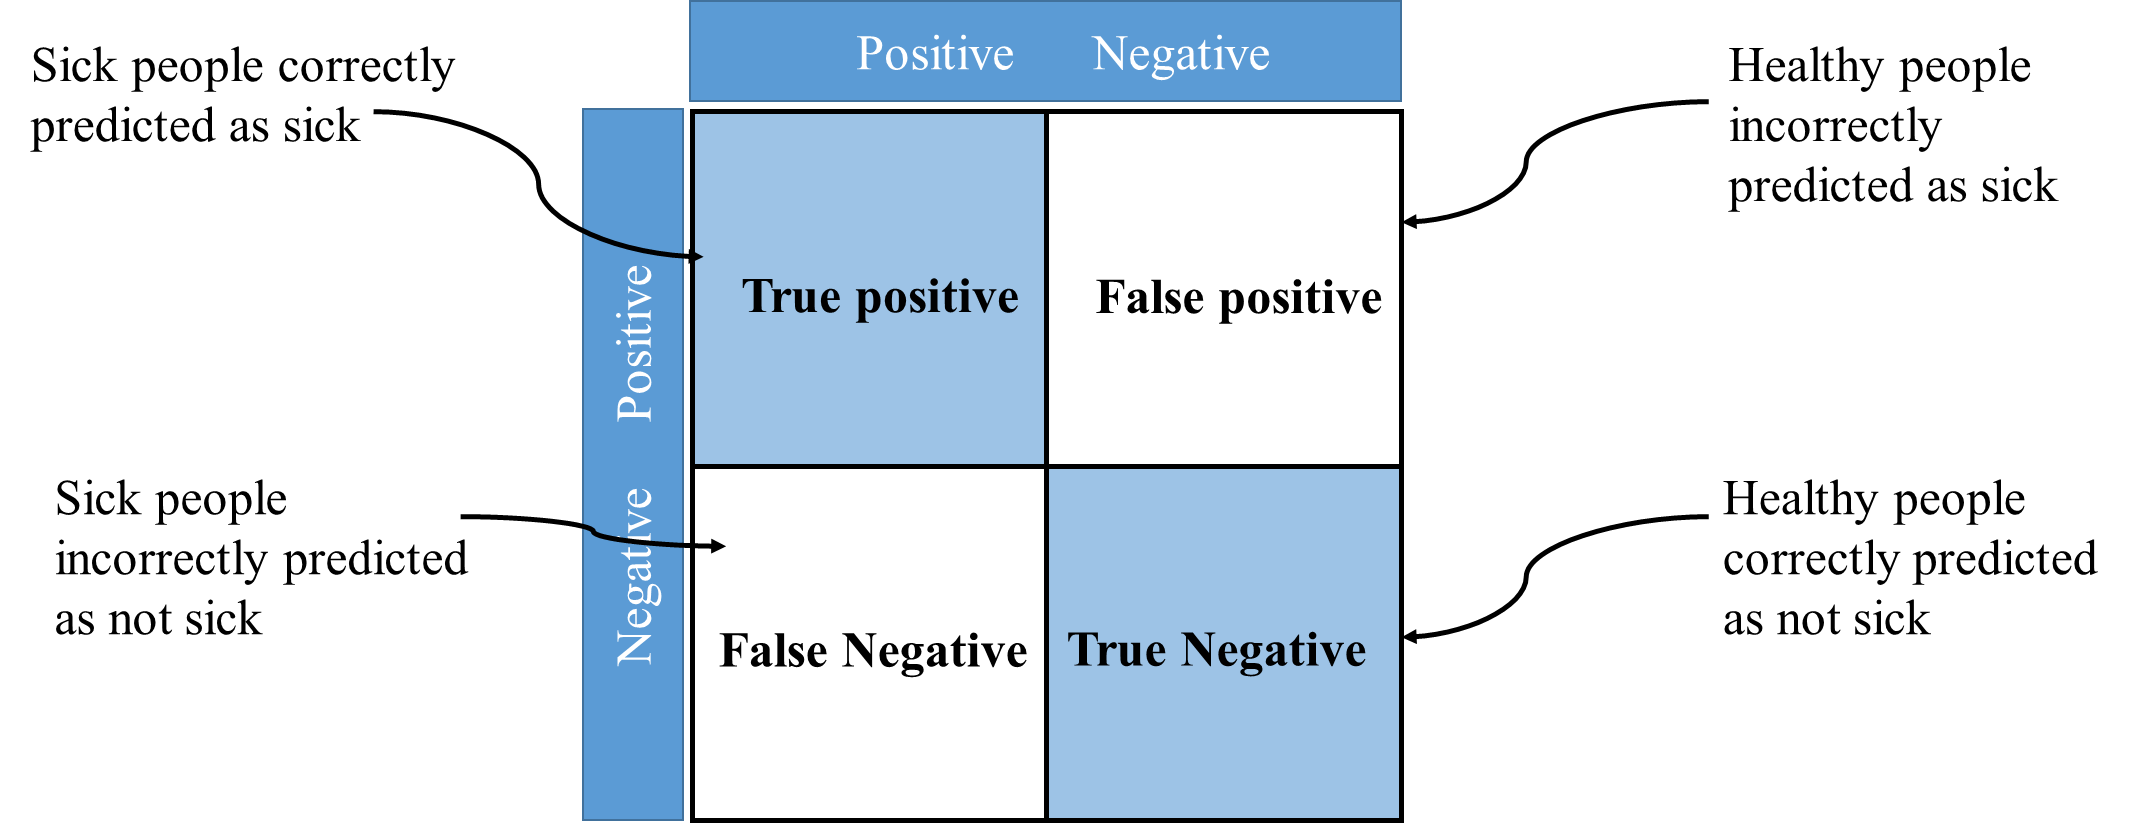

In [ ]:
# Metrics for SVM
print('\nMetrics for SVM:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_svm):.2f}')
print(f'Recall (Sensitivity): {recall_score(y_test, y_pred_svm):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred_svm):.2f}')

# ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print(f'ROC AUC: {roc_auc_svm:.2f}')

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(cm_svm)

In [ ]:
# Plot Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - SVM')
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, annot_kws={"size": 16})
plt.show()

# Plot ROC Curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

# **Model Evaluation**

In [ ]:
# SHAP values
explainer_svm = shap.Explainer(svm_classifier.predict, X_train_pca)
shap_values_svm = explainer_svm(X_val_pca)